In [1]:
import bz2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
from pylab import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
DATA_DIR = '../../data/cluster/year/'

In [3]:
#os.listdir(DATA_DIR)

In [4]:
def load_x_and_following_n_ys(data_path, year, n=3, verbose=False):
    x_path = data_path + 'tensor%d.pkl.bz2' % year
    y_paths = [data_path + 'y_matrix%d.pkl.bz2' % (year + i) for i in range(1, n + 1)]
    if verbose: 
        print('\nLoading X tensor from %s' % x_path)
    X = pickle.load(bz2.open(x_path, 'rb'))
    Ys = []
    for y_path in y_paths:
        if verbose: 
            print('Loading y tensor from %s' % y_path)
        Y = pickle.load(bz2.open(y_path, 'rb'))
        Ys.append(Y)
    
    if verbose:
        print('  X: ', X.shape, '(width, height, layers)')
        for Y in Ys:
            print('  Y: ', Y.shape, '    (width, height)')
    return X, Ys

In [8]:
X, next_Ys = load_x_and_following_n_ys(DATA_DIR, 2000, n=3, verbose=True)


Loading X tensor from ../../data/cluster/year/tensor2000.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2001.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2002.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2003.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)
  Y:  (188, 353)     (width, height)
  Y:  (188, 353)     (width, height)


In [7]:
def add_next_n_years_beetle_data(X, next_Ys):
    width, height, layers = X.shape
    for next_Y in next_Ys:
        X = np.concatenate([X, next_Y.reshape([width, height, 1])], axis=2)
    return X

In [10]:
X_new = add_next_n_years_beetle_data(X, next_Ys)

In [11]:
X_new.shape # H, W, L: L 0-18: climate, 19 - 21 are years +1, +2, +3

(188, 353, 22)

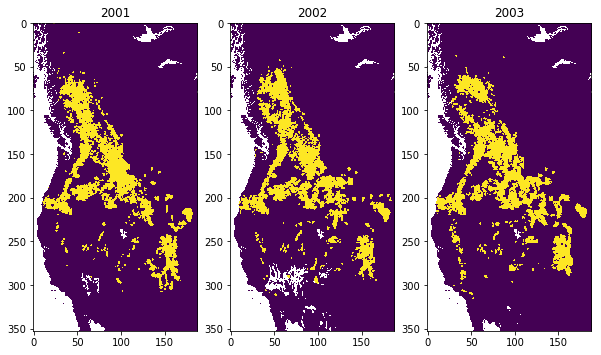

In [12]:
plt.subplot(131);
imshow(np.rot90(X_new[:, :, 19]));
plt.title(2001);
plt.subplot(132);
imshow(np.rot90(X_new[:, :, 20]));
plt.title(2002);
plt.subplot(133);
imshow(np.rot90(X_new[:, :, 21]));
plt.title(2003);

In [13]:
def make_and_save_tensor(data_path, year, verbose=True):
    print('\nMaking new tensor for %d' % year)
    out_path = data_path + 'tensor3y_ahead_%d.pkl.bz2' % year
    X, next_Ys = load_x_and_following_n_ys(data_path, year, n=3, verbose=verbose)
    new_X = add_next_n_years_beetle_data(X, next_Ys)
    print('Saving tensor to %s...' % out_path)
    pickle.dump(new_X, bz2.open(out_path, 'wb'))

In [14]:
for year in range(2000, 2012):
    make_and_save_tensor(DATA_DIR, year)


Making new tensor for 2000

Loading X tensor from ../../data/cluster/year/tensor2000.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2001.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2002.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2003.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)
  Y:  (188, 353)     (width, height)
  Y:  (188, 353)     (width, height)
Saving tensor to ../../data/cluster/year/tensor3y_ahead_2000.pkl.bz2...

Making new tensor for 2001

Loading X tensor from ../../data/cluster/year/tensor2001.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2002.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2003.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2004.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)
  Y:  (188, 353)     (width, height)
  Y:  (188, 353)     (width, height)
Saving tensor to ../../dat